<div>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/64/Sharif_University_Logo.jpg' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 7: Practical - Decision Tree and Ensembles <br> <br>
<font color=686880 size=4>
    TAs: Amirhossein Ramazani Bonab - Arman Malekzadeh
    
____

### Full Name : Reza Soumi
### Student Number : 98105857
### Colab Link: https://colab.research.google.com/drive/1uLFUs3OhoP8_P2ZzRJtPHtPXOGXnP0ae?usp=sharing
___

**About the Dataset:**


Measurements of geometrical properties of kernels belonging to three different varieties of wheat.

A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

**Data Set Information:**


The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

To construct the data, seven geometric parameters of wheat kernels were measured:

- area A,
- perimeter P,
- compactness C = 4piA/P^2,
- length of kernel,
- width of kernel,
- asymmetry coefficient
- length of kernel groove.

The target column is "Type".

The data set can be used for the tasks of classification and cluster analysis.

https://archive.ics.uci.edu/ml/datasets/seeds

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from random import choices
import math

## P1: Explore the Dataset

In [2]:
!wget -O dataset.csv https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1

--2023-06-05 09:04:17--  https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv [following]
--2023-06-05 09:04:18--  https://www.dropbox.com/s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e27e679b7e48a462ee53dace3.dl.dropboxusercontent.com/cd/0/get/B9bbNJBUBWoNk00pfCu0CSlWbJcjyH8Lgzf1i2bBlmRQ1ZivGM4Lj9tW9mn2TOIuCbqcZD0VrdFizETHCwliGixo2yDlodQ1C2PUUVQ5SgSuUXlTP8KTRXPhXrht9ta1A_1ITVpJhxY7jrBTmR11xlv_evDve7dzkbx-zWY9z---LOjkL7aQS9-5D2gWuongYZY/file?dl=1# [following]
--2023-06-05 09:04:19--  https://uc8e27e679b7e48a462ee53dace3.dl.dropboxusercontent.com/cd/0/get/B9bbNJBUBWoNk00pfCu0CSlWbJcjyH8Lgz

Load the dataset as a dataframe

In [3]:
df = pd.read_csv("dataset.csv")
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Check if there are any missing values (and remove them) **(P1-1: 2 points)**

In [4]:
print(df.isnull().sum())
df.dropna(inplace=True)
df

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Plot the heatmap of the correlation matrix between features **(P1-2: 3 points)**

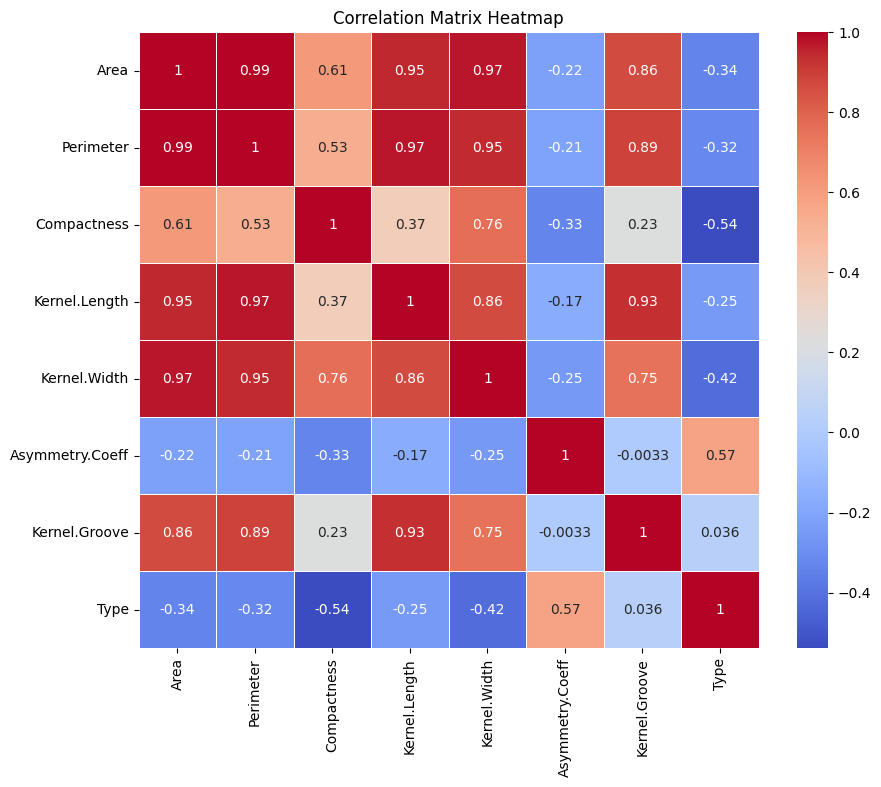

In [5]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Remove features which are highly correlated (> 95%) with the other ones **(P1-3: 5 points)**

In [6]:
highly_correlated = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            if colname_j in highly_correlated:
                continue
            highly_correlated.add(colname_i)
            break

df_filtered = df.drop(columns=highly_correlated)
df_filtered

,Area,Compactness,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,0.8710,2.221,5.220,1
1,14.88,0.8811,1.018,4.956,1
2,14.29,0.9050,2.699,4.825,1
3,13.84,0.8955,2.259,4.805,1
4,16.14,0.9034,1.355,5.175,1
...,...,...,...,...,...
194,12.19,0.8783,3.631,4.870,3
195,11.23,0.8511,4.325,5.003,3
196,13.20,0.8883,8.315,5.056,3
197,11.84,0.8521,3.598,5.044,3


Check for imbalance between classes **(P1-4: 3 points)**

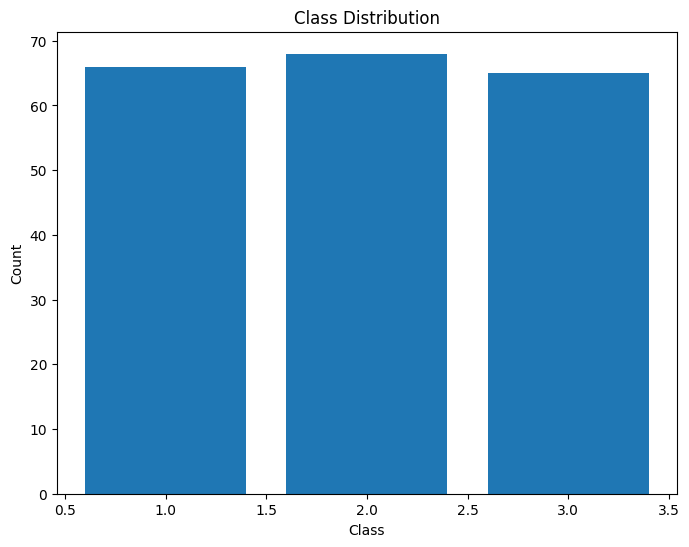

2    0.341709
1    0.331658
3    0.326633
Name: Type, dtype: float64


In [7]:
class_counts = df_filtered['Type'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

class_proportions = class_counts / len(df)
print(class_proportions)

## P2: Prepare the Training Data

Convert features and the target into numpy arrays **(P2-1: 2 points)**

In [8]:
features = df_filtered.drop('Type', axis=1).values
target = df_filtered['Type'].values

print("Features shape:", features.shape)
print("Target shape:", target.shape)

Features shape: (199, 4)
Target shape: (199,)


Split the samples into training (80%) and testing (20%) arrays **(P2-2: 5 points)**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Training data - Features shape:", X_train.shape)
print("Training data - Target shape:", y_train.shape)
print("Testing data - Features shape:", X_test.shape)
print("Testing data - Target shape:", y_test.shape)

Training data - Features shape: (159, 4)
Training data - Target shape: (159,)
Testing data - Features shape: (40, 4)
Testing data - Target shape: (40,)


## P3: Decision Tree Implementation

Implement desicion tree for classification from scratch **(P3-1: 20 points)**

In [49]:
class DecisionTree:
     
    def __init__(self, criterion="entropy", max_depth=None):
        """
        Parameters:
        
        criterion -- “gini” for the Gini impurity and “entropy” for the Information Gain. (default “entropy”)
        max_depth -- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure. (default=None)
        """
        
        self.criterion = criterion
        self.max_depth = max_depth
        self.tree = None
    
    def fit(self, X, y):
        """
        Build a decision tree classifier from the training set (X, y).

        Returns:
        self : Fitted estimator
        """

        self.tree = self._build_tree(X, y, depth=0)
        return self
    
    def predict(self, X):
        """
        Predict class value for X.

        Returns:
        y : The predicted classes
        """

        y_pred = np.array([self._predict_sample(x, self.tree) for x in X])
        return y_pred
    
    def _build_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return {'class': self._get_majority_class(y)}
        
        best_split = self._find_best_split(X, y)
        if best_split is None:
            return {'class': self._get_majority_class(y)}
        
        feature_idx, threshold = best_split
        
        left_idxs = X[:, feature_idx] < threshold
        X_left, y_left = X[left_idxs], y[left_idxs]
        X_right, y_right = X[~left_idxs], y[~left_idxs]
        
        left_subtree = self._build_tree(X_left, y_left, depth + 1)
        right_subtree = self._build_tree(X_right, y_right, depth + 1)
        
        return {'feature_idx': feature_idx, 'threshold': threshold, 'left': left_subtree, 'right': right_subtree}

    def _find_best_split(self, X, y):
        best_info_gain = -1
        best_split = None
        
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                info_gain = self._calculate_info_gain(X, y, feature_idx, threshold)
                if info_gain > best_info_gain:
                    best_info_gain = info_gain
                    best_split = (feature_idx, threshold)
        
        return best_split

    def _calculate_info_gain(self, X, y, feature_idx, threshold):
        parent_entropy = self._calculate_entropy(y)
        
        left_idxs = X[:, feature_idx] < threshold
        right_idxs = X[:, feature_idx] >= threshold
        
        if self.criterion == 'gini':
            left_child_entropy = self._calculate_gini_index(y[left_idxs])
            right_child_entropy = self._calculate_gini_index(y[right_idxs])
        else:
            left_child_entropy = self._calculate_entropy(y[left_idxs])
            right_child_entropy = self._calculate_entropy(y[right_idxs])
        
        n = len(y)
        left_weight = len(y[left_idxs]) / n
        right_weight = len(y[right_idxs]) / n
        
        info_gain = parent_entropy - (left_weight * left_child_entropy + right_weight * right_child_entropy)
        return info_gain

    def _calculate_entropy(self, y):
        unique_classes, class_counts = np.unique(y, return_counts=True)
        probabilities = class_counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy
    
    def _calculate_gini_index(self, y):
        unique_classes, class_counts = np.unique(y, return_counts=True)
        probabilities = class_counts / len(y)
        gini_index = 1 - np.sum(probabilities**2)
        return gini_index

    def _get_majority_class(self, y):
        unique_classes, class_counts = np.unique(y, return_counts=True)
        majority_class = unique_classes[np.argmax(class_counts)]
        return majority_class
    
    def _predict_sample(self, x, node):
        if 'class' in node:
            return node['class']
        
        feature_idx = node['feature_idx']
        threshold = node['threshold']
        
        if x[feature_idx] < threshold:
            return self._predict_sample(x, node['left'])
        else:
            return self._predict_sample(x, node['right'])

Define two decision trees with two different criterion **(P3-2: 3 points)**

In [50]:
tree_entropy = DecisionTree(criterion="entropy")
tree_gini = DecisionTree(criterion="entropy")

Fit the defined decision trees on training samples **(P3-3: 2 points)**

In [51]:
tree_entropy.fit(X_train, y_train)
tree_gini.fit(X_train, y_train)

Get the results on the test set **(P3-4: 5 points)**

In [52]:
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_gini = tree_gini.predict(X_test)

Train the decision trees, considering the values [1,2,3,4,5] as the maximum depth **(P3-5: 5 points)**

In [54]:
tree_depth_1 = DecisionTree(criterion="entropy", max_depth=1)
tree_depth_2 = DecisionTree(criterion="entropy", max_depth=2)
tree_depth_3 = DecisionTree(criterion="entropy", max_depth=3)
tree_depth_4 = DecisionTree(criterion="entropy", max_depth=4)
tree_depth_5 = DecisionTree(criterion="entropy", max_depth=5)

tree_depth_1.fit(X_train, y_train)
tree_depth_2.fit(X_train, y_train)
tree_depth_3.fit(X_train, y_train)
tree_depth_4.fit(X_train, y_train)
tree_depth_5.fit(X_train, y_train)

y_pred_depth_1 = tree_depth_1.predict(X_test)
y_pred_depth_2 = tree_depth_2.predict(X_test)
y_pred_depth_3 = tree_depth_3.predict(X_test)
y_pred_depth_4 = tree_depth_4.predict(X_test)
y_pred_depth_5 = tree_depth_5.predict(X_test)

Compare the accuracy score of the decision trees with and without using the "max_depth" parameter and discuss the effects of limiting the maximum depth of decision trees. **(P3-6: 5 points)**

In [57]:
accuracy_no_limit_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_no_limit_gini = accuracy_score(y_test, y_pred_gini)
accuracy_with_limit_entropy_max_depth_1 = accuracy_score(y_test, y_pred_depth_1)
accuracy_with_limit_entropy_max_depth_2 = accuracy_score(y_test, y_pred_depth_2)
accuracy_with_limit_entropy_max_depth_3 = accuracy_score(y_test, y_pred_depth_3)
accuracy_with_limit_entropy_max_depth_4 = accuracy_score(y_test, y_pred_depth_4)
accuracy_with_limit_entropy_max_depth_5 = accuracy_score(y_test, y_pred_depth_5)

print("Accuracy without max depth entropy:", accuracy_no_limit_entropy)
print("Accuracy without max depth gini:", accuracy_no_limit_gini)
print("Accuracy with max depth 1 entropy:", accuracy_with_limit_entropy_max_depth_1)
print("Accuracy with max depth 2 entropy:", accuracy_with_limit_entropy_max_depth_2)
print("Accuracy with max depth 3 entropy:", accuracy_with_limit_entropy_max_depth_3)
print("Accuracy with max depth 4 entropy:", accuracy_with_limit_entropy_max_depth_4)
print("Accuracy with max depth 5 entropy:", accuracy_with_limit_entropy_max_depth_5)

Accuracy without max depth entropy: 0.825
Accuracy without max depth gini: 0.825
Accuracy with max depth 1 entropy: 0.65
Accuracy with max depth 2 entropy: 0.875
Accuracy with max depth 3 entropy: 0.8
Accuracy with max depth 4 entropy: 0.825
Accuracy with max depth 5 entropy: 0.825


<p>Generally, limiting the maximum depth can help prevent overfitting and improve the generalization of the model. It can help reduce the complexity of the decision trees and make them less prone to capturing noise or irrelevant patterns in the data. However, setting the maximum depth too low may lead to underfitting, where the decision tree may struggle to capture the underlying patterns and achieve lower accuracy. It is essential to find the right balance for the maximum depth parameter based on the specific dataset and problem at hand. In this case, it seems max depth 5 is good threshold and also it can derive from cross validation strategy.</p>

## P4: Ensemble Models

### P4-1: Bagging

Implement the bagging algorithm for classification from scratch **(P4-1-1: 15 points)**

In [67]:
class BaggingDecisionTree:
     
    def __init__(self, bootstraped_training_num=50, predictors_num=50):
        """
        Parameters:
        
        bootstraped_training_num -- The number of training sets we are gonna have
        predictors_num -- The number of predictors we want to use for each test sample
        """

        self.bootstraped_training_num = bootstraped_training_num
        self.predictors_num = predictors_num
        self.classifiers = []
    
    def fit(self, X, y):
        """
        Create `self.bootstraped_training_num` training sets by random sampling of the input training elements with replacement.
        Then create the same number of classifiers and fit each classifier on the corresponding training set.
        
        Paramters:
        X : training features array
        y : target array
        
        Returns:
        self : Fitted estimator
        """
        
        for _ in range(self.bootstraped_training_num):
            indices = np.random.choice(len(X), len(X), replace=True)
            X_bootstrap = X[indices]
            y_bootstrap = y[indices]
            
            tree = DecisionTree()
            tree.fit(X_bootstrap, y_bootstrap)
            
            self.classifiers.append(tree)
        
        return self
    
    def predict(self, X):
        """
        Predict class value for X using majority voting of `self.predictors_num` classifiers.

        Paramters:
        X : training features array
        
        Returns:
        y : The predicted classes
        """

        selected_classifiers = np.random.choice(self.classifiers, size=self.predictors_num, replace=False)
        
        predictions = np.zeros((len(X), self.predictors_num))
        
        for i, tree in enumerate(selected_classifiers):
            predictions[:, i] = tree.predict(X)
        
        y_pred = []
        for i in range(len(X)):
            counts = np.bincount(predictions[i, :].astype(int))
            majority_class = np.argmax(counts)
            y_pred.append(majority_class)
        
        return np.array(y_pred)

Create an instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=50` and fit it on the training data **(P4-1-2: 3 points)**

In [68]:
bagging_tree = BaggingDecisionTree(bootstraped_training_num=50, predictors_num=50)

bagging_tree.fit(X_train, y_train)

Create another instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=7` and fit it on the training data **(P4-1-3: 2 points)**

In [69]:
bagging_tree_2 = BaggingDecisionTree(bootstraped_training_num=50, predictors_num=7)

bagging_tree_2.fit(X_train, y_train)

Test the created models on the test set. Discuss differences of two approaches we adopted. **(P4-1-4: 5 points)**

In [70]:
y_pred_1 = bagging_tree.predict(X_test)

y_pred_2 = bagging_tree_2.predict(X_test)

accuracy_1 = accuracy_score(y_test, y_pred_1)
accuracy_2 = accuracy_score(y_test, y_pred_2)

print("Accuracy with bootstraped training number 50 and predictors number of 50:", accuracy_1)
print("Accuracy with bootstraped training number 50 and predictors number of 7:", accuracy_2)

Accuracy with bootstraped training number 50 and predictors number of 50: 0.825
Accuracy with bootstraped training number 50 and predictors number of 7: 0.825


<p>Let's discuss the differences between the two approaches we adopted:

Number of Predictors: In the first approach (bagging_tree), we used all the classifiers (decision trees) trained during the bagging process for predicting the class value. In contrast, in the second approach (bagging_tree_2), we randomly selected a subset of predictors_num classifiers from the total number of classifiers to make predictions. This allows for greater variability in predictions and can help reduce overfitting when using a smaller number of predictors.

Effect on Variance and Bias: The first approach with all classifiers (bagging_tree) tends to have lower variance as it uses more diverse models. However, it may have a higher bias due to potential overfitting if the individual classifiers are too complex or the number of classifiers is large. On the other hand, the second approach with a smaller number of predictors (bagging_tree_2) reduces variance by introducing randomness in the model selection process. It may have a slightly higher bias due to using fewer classifiers, but it helps to control overfitting.

Trade-off between Diversity and Performance: The first approach aims for higher diversity among classifiers by considering all of them, potentially leading to better performance if the individual classifiers are diverse and accurate. However, it can be computationally expensive and may not be necessary when there is a large number of classifiers. The second approach balances diversity and computational efficiency by randomly selecting a subset of classifiers. It can achieve similar or slightly lower performance compared to using all classifiers but with reduced computational cost.</p>

### P4-2: Boosting

Implement the Adaboost algorithm for classification from scratch **(P4-2-1: 10 points)**

In [78]:
class DecisionTreeWeighted:
     
    def __init__(self, criterion="entropy", max_depth=None):
        """
        Parameters:
        
        criterion -- “gini” for the Gini impurity and “entropy” for the Information Gain. (default “entropy”)
        max_depth -- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure. (default=None)
        """
        self.criterion = criterion
        self.max_depth = max_depth
        self.tree = None
    
    def fit(self, X, y, sample_weight=None):
        """
        Build a decision tree classifier from the training set (X, y).

        Returns:
        self : Fitted estimator
        """
        self.tree = self._build_tree(X, y, sample_weight, depth=0)
        return self
    
    def predict(self, X):
        """
        Predict class value for X.

        Returns:
        y : The predicted classes
        """
        y_pred = np.array([self._predict_sample(x, self.tree) for x in X])
        return y_pred
    
    def _build_tree(self, X, y, sample_weight, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return {'class': self._get_majority_class(y)}
        
        best_split = self._find_best_split(X, y, sample_weight)
        if best_split is None:
            return {'class': self._get_majority_class(y)}
        
        feature_idx, threshold = best_split
        
        left_idxs = X[:, feature_idx] < threshold
        X_left, y_left = X[left_idxs], y[left_idxs]
        X_right, y_right = X[~left_idxs], y[~left_idxs]
        sample_weight_left, sample_weight_right = sample_weight[left_idxs], sample_weight[~left_idxs]
        
        left_subtree = self._build_tree(X_left, y_left, sample_weight_left, depth + 1)
        right_subtree = self._build_tree(X_right, y_right, sample_weight_right, depth + 1)
        
        return {'feature_idx': feature_idx, 'threshold': threshold, 'left': left_subtree, 'right': right_subtree}
    
    def _find_best_split(self, X, y, sample_weight):
        best_info_gain = -1
        best_split = None
        
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                info_gain = self._calculate_info_gain(X, y, sample_weight, feature_idx, threshold)
                if info_gain > best_info_gain:
                    best_info_gain = info_gain
                    best_split = (feature_idx, threshold)
        
        return best_split
    
    def _calculate_info_gain(self, X, y, sample_weight, feature_idx, threshold):
        parent_criterion = self._calculate_criterion(y)
        
        left_idxs = X[:, feature_idx] < threshold
        right_idxs = X[:, feature_idx] >= threshold
        
        left_weight = np.sum(sample_weight[left_idxs])/(np.sum(sample_weight[left_idxs])+np.sum(sample_weight[right_idxs])) # Added
        right_weight = np.sum(sample_weight[right_idxs])/(np.sum(sample_weight[left_idxs])+np.sum(sample_weight[right_idxs])) # Added

        if self.criterion == 'gini':
            left_child_criterion = self._calculate_criterion(y[left_idxs])
            right_child_criterion = self._calculate_criterion(y[right_idxs])
        else:
            left_child_criterion = self._calculate_criterion(y[left_idxs])
            right_child_criterion = self._calculate_criterion(y[right_idxs])
        
        info_gain = parent_criterion - (left_weight * left_child_criterion + right_weight * right_child_criterion)
        return info_gain
    
    def _calculate_criterion(self, y):
        unique_classes, class_counts = np.unique(y, return_counts=True)
        probabilities = class_counts / len(y)
        if self.criterion == 'gini':
            criterion = 1 - np.sum(probabilities**2)
        else:
            criterion = -np.sum(probabilities * np.log2(probabilities + 1e-16))
        return criterion
    
    def _get_majority_class(self, y):
        unique_classes, class_counts = np.unique(y, return_counts=True)
        majority_class = unique_classes[np.argmax(class_counts)]
        return majority_class
    
    def _predict_sample(self, x, node):
        if 'class' in node:
            return node['class']
        
        feature_idx = node['feature_idx']
        threshold = node['threshold']
        
        if x[feature_idx] < threshold:
            return self._predict_sample(x, node['left'])
        else:
            return self._predict_sample(x, node['right'])


In [75]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class AdaBoost:
     
    def __init__(self, weak_classifiers_count=50):
        """
        Parameters:
        weak_classifiers_count -- The number of weak classifiers we are gonna have
        """
        self.weak_classifiers_count = weak_classifiers_count
        self.classifiers = []
        self.classifier_weights = []
    
    def fit(self, X, y):
        """
        Fit the Adaboost on training data. Take DecisionTree with max_depth of 1 (stump) as your weak classifier.
        
        Parameters:
        X : training features array
        y : target array
        
        Returns:
        self : Fitted estimator
        """
        n_samples = len(X)
        weights = np.ones(n_samples) / n_samples
        
        for _ in range(self.weak_classifiers_count):
            classifier = DecisionTreeWeighted(max_depth=1)
            
            classifier.fit(X, y, sample_weight=weights)
            
            predictions = classifier.predict(X)
            
            error = np.sum(weights[predictions != y])
            
            alpha = 0.5 * np.log((1 - error) / max(error, 1e-16))
            
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)
            
            self.classifiers.append(classifier)
            self.classifier_weights.append(alpha)
        
        return self
    
    def predict(self, X):
        """
        Predict class value for X using majority voting of `self.predictors_num` classifiers.

        Parameters:
        X : training features array
        
        Returns:
        y : The predicted classes
        """
        n_samples = len(X)
        predictions = np.zeros((n_samples, self.weak_classifiers_count))
        
        for i, classifier in enumerate(self.classifiers):
            predictions[:, i] = classifier.predict(X)
        
        weighted_predictions = np.zeros(n_samples)
        for i, alpha in enumerate(self.classifier_weights):
            weighted_predictions += alpha * predictions[:, i]
        
        y_pred = np.sign(weighted_predictions)
        
        return y_pred


Create an instance of Adaboost and fit it to the data **(P4-2-2: 2 points)**

In [76]:
ada = AdaBoost()

ada.fit(X_train, y_train)

<ipython-input-75-9020700ecfa2>:38: RuntimeWarning: divide by zero encountered in log
  alpha = 0.5 * np.log((1 - error) / max(error, 1e-16))
<ipython-input-75-9020700ecfa2>:41: RuntimeWarning: invalid value encountered in true_divide
  weights /= np.sum(weights)


Test Adaboost on the testing set **(P4-2-3: 3 points)**

In [77]:
y_pred = bagging_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with 50 weak_classifiers_count:", accuracy)

Accuracy with 50 weak_classifiers_count: 0.825


<p>So it seems accuracy of boosting and bagging in our case is near to the neural network (above 80%). So why neural network become the most used approach instead of tree-based methods?</p>
<p>Neural networks have gained wide popularity for several reasons:
Flexibility and Power: Neural networks are highly flexible and can model complex non-linear relationships between features and target variables. They can capture intricate patterns and dependencies in the data, making them suitable for a wide range of tasks, including image recognition, natural language processing, and speech recognition. Tree-based methods, such as decision trees and random forests, are limited in their ability to represent complex functions.

End-to-End Learning: Neural networks enable end-to-end learning, where the model learns to extract relevant features automatically from raw data. In contrast, tree-based methods typically require manual feature engineering, where domain knowledge and expertise are needed to identify and engineer relevant features. Neural networks can learn hierarchical representations of features, which eliminates the need for manual feature engineering in many cases.

Scalability: Neural networks can handle large-scale datasets efficiently, especially with the advancements in hardware and parallel computing. They can benefit from modern hardware architectures, such as GPUs and TPUs, to accelerate training and inference. Tree-based methods, on the other hand, can struggle with large and high-dimensional datasets, as they may require substantial computational resources and memory.

Continuous Improvement: Neural networks have seen significant advancements in recent years, fueled by ongoing research and innovations in deep learning. New architectures, regularization techniques, optimization algorithms, and training strategies are continuously being developed, leading to improved performance and state-of-the-art results in various domains.

Transfer Learning and Pretrained Models: Neural networks can leverage transfer learning and pretrained models, where models pretrained on large-scale datasets, such as ImageNet or BERT, can be fine-tuned for specific tasks with smaller labeled datasets. This transfer of knowledge allows neural networks to benefit from the learned representations and can lead to better performance, even with limited training data.

Despite these advantages, tree-based methods still have their merits and are widely used in practice. They are often interpretable, can handle categorical features naturally, and are robust to outliers and missing values. Additionally, tree-based methods can be more computationally efficient for certain tasks and datasets, especially when interpretability and feature importance are critical.</p>